# Scalend Bank Data Analysis

## The aim is to build a model to classify newly added samples. 

#### This data includes 17 columns out of which 7 features have more have 70% of missing data. I have used several methods to predict the missing data and have replaced it with the predicted classes.

###### Below I have imported libraries.
    

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

_The data is extracted from the excel file and converted into data frame using pandas._

In [166]:
data1 = pd.read_excel('F:\Machine Learning\Projects\Scalend\sample_data_test.xlsx',sep='\t')
data = pd.DataFrame(data1)
data.columns = ['cid_no','channel_id','transaction_id','transaction_datetime','transaction_amount','product','service_category','transaction_location','transaction_type','customer_type','sex','date_of_birth','educational_status','income','minor','marital_status','dependents']
data

,cid_no,channel_id,transaction_id,transaction_datetime,transaction_amount,product,service_category,transaction_location,transaction_type,customer_type,sex,date_of_birth,educational_status,income,minor,marital_status,dependents
0,A0AA2953,ATM1,033ISAL171174163,2017-04-27 13:22:00,209232.75,NaN,REMITTANCE,19,FINANCIAL,I,M,1963-08-06 00:00:00,NON STUDENT,SALARY,N,M,8
1,A2735A56,ATM1,033DBLC171091109,2017-04-20 03:56:00,275000.00,NaN,REMITTANCE,3,FINANCIAL,I,M,1977-01-26 00:00:00,NON STUDENT,BUSINESS,N,M,2
2,A2735A56,Teller,071CHDP171090510,2017-04-19 00:00:00,240000.00,NaN,CASH DEPOSIT,3,FINANCIAL,I,M,1977-01-26 00:00:00,NON STUDENT,BUSINESS,N,M,2
3,A070599A,ATM,056CHDP171140032,2017-04-24 00:00:00,650000.00,NaN,CASH DEPOSIT,45,FINANCIAL,C,NaN,~,NaN,NaN,NaN,NaN,0
4,A06A3745,ATM1,045CHDP171140022,2017-04-24 00:00:00,300000.00,NaN,CASH DEPOSIT,14,FINANCIAL,C,NaN,~,NaN,NaN,N,NaN,0
5,A2866073,ATM1,008CHDP171030503,2017-04-13 00:00:00,916500.00,NaN,CASH DEPOSIT,8,FINANCIAL,C,NaN,~,NaN,NaN,N,NaN,0
6,A2889968,ATM2,033DCRD171150139,2017-04-25 12:46:00,256050.00,NaN,REMITTANCE,71,FINANCIAL,I,M,1968-09-28 00:00:00,NON STUDENT,SALARY,N,M,2
7,A2907254,ATM2,072CHDP170990024,2017-04-09 00:00:00,992515.00,NaN,CASH DEPOSIT,47,FINANCIAL,C,NaN,~,NaN,NaN,NaN,NaN,0
8,A27A7299,ATM1,004CHDP170980010,2017-04-08 00:00:00,386000.00,NaN,CASH DEPOSIT,91,FINANCIAL,C,NaN,~,NaN,NaN,N,NaN,0
9,A27A7299,ATM1,004CHDP170980009,2017-04-08 00:00:00,900000.00,NaN,CASH DEPOSIT,91,FINANCIAL,C,NaN,~,NaN,NaN,N,NaN,0


#### This indicated that the data consists of 2653 samples and 17 features.

In [106]:
data.shape

(2653, 17)

_Calculating the percentage of the missing values in each of the features_

In [168]:
num = data.isnull().sum()
total = len(data)
print num/total

cid_no                  0.000000
channel_id              0.000000
transaction_id          0.000000
transaction_datetime    0.000000
transaction_amount      0.000000
product                 1.000000
service_category        0.000000
transaction_location    0.000000
transaction_type        0.000000
customer_type           0.000000
sex                     0.692424
date_of_birth           0.706747
educational_status      0.732378
income                  0.759894
minor                   0.387109
marital_status          0.725594
dependents              0.000000
dtype: float64


_Removing the feature called 'product' because it has 0 data and consists of only missing values which is useless in our dataset.
Creating a data set which consists on zero missing data to train and predcit the missing values._

In [108]:
data_extraction = data.drop('product',1)
data_no_nulls = data_extraction.dropna()
data_no_nulls = data_no_nulls.reset_index()

_Transforming the data into a dataframe where the catagorical values are converted using one hot-encoding method so that it consists of only numeric data_

_Predicting the missing values using a Logistic regression because the feature 'transaction__amount' ranges till 600000 and using logistic function will scale the values and variance will be reduced._

In [112]:
train_data = data_no_nulls[['channel_id','service_category','transaction_type','dependents','transaction_amount','transaction_location']]
train = pd.get_dummies(train_data)

X_sex = train
y_sex = data_no_nulls['sex']
x_train,x_test,y_train,y_test = train_test_split(X_sex,y_sex,test_size = 0.2)

test_data = data[['channel_id','service_category','transaction_type','dependents','transaction_amount','transaction_location']]
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

print logreg.score(x_test,y_test)

0.834782608696


## Using Logistic regression to predict the missing values

_The feature sex consists of two categories 'M' and 'F' and the data is predicted. The main data's missing values is then replaced with the predicted classes._

In [7]:
#sex predcition

train_data = data_no_nulls[['channel_id','service_category','transaction_type','dependents','transaction_amount','transaction_location']]
train_data_x = pd.get_dummies(train_data)
train_data_y = (data_no_nulls[['sex']])

test_data = data[['channel_id','service_category','transaction_type','dependents','transaction_amount','transaction_location']]
test_data_x = pd.get_dummies(test_data)
logreg.fit(train_data_x,train_data_y)
sex_predicted = pd.DataFrame()
sex_predicted['sex1'] = logreg.predict(test_data_x)

c:\python27\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_Predicting the age of the customer so that this feature can be converted into another feature of continuous varaibles and can be used to build the model._

In [8]:
#predicting the age 

import datetime as datetime
dob = pd.DataFrame()
dob['dob'] = pd.to_datetime(data_no_nulls['date_of_birth'])
now = datetime.datetime.now()    
dob['age'] = (now - dob['dob'])/365.25
dob['age'] = dob['age'].astype('timedelta64[D]')

_Predicting if the particular cliet is minor or not_

In [9]:
#predicting minor or not

train_minor_x = train_data_x
train_minor_y = data_no_nulls['minor']

test_minor = data[['channel_id','service_category','transaction_type','dependents','transaction_amount','transaction_location']]
test_minor = pd.get_dummies(test_minor)
logreg.fit(train_minor_x,train_minor_y)
minor_predicted = pd.DataFrame()
minor_predicted['minor1'] = logreg.predict(test_minor)

_Predicting the educational status_

In [10]:
#predicting educational status

train_edu_x = train_data_x
train_edu_y = data_no_nulls['educational_status']

test_edu = data[['channel_id','service_category','transaction_type','dependents','transaction_amount','transaction_location']]
test_edu = pd.get_dummies(test_edu)
logreg.fit(train_edu_x,train_edu_y)
edu_predicted = pd.DataFrame()
edu_predicted['edu1'] = logreg.predict(test_edu)

_Predicting the income_

In [11]:
#predicting income

train_income_x = train_data_x
train_income_y = data_no_nulls['income']

test_income = data[['channel_id','service_category','transaction_type','dependents','transaction_amount','transaction_location']]
test_income = pd.get_dummies(test_income)
logreg.fit(train_income_x,train_income_y)
income_predicted = pd.DataFrame()
income_predicted['income1'] = logreg.predict(test_income)

_Predicting the marital status_

In [12]:
#predicting marital_status 

train_marital_status_x = train_data_x
train_marital_status_y = data_no_nulls['marital_status']

test_marital_status = data[['channel_id','service_category','transaction_type','dependents','transaction_amount','transaction_location']]
test_marital_status = pd.get_dummies(test_marital_status)
logreg.fit(train_marital_status_x,train_marital_status_y)
marital_status_predicted = pd.DataFrame()
marital_status_predicted['marital_status1'] = logreg.predict(test_marital_status)

## Replacing the predicted classes with the missing values

In [13]:
final_replaced = data_extraction
final_replaced.sex.fillna(sex_predicted.sex1, inplace=True)
final_replaced.minor.fillna(minor_predicted.minor1, inplace=True)
final_replaced.marital_status.fillna(marital_status_predicted.marital_status1, inplace=True)
final_replaced.income.fillna(income_predicted.income1, inplace=True)
final_replaced.educational_status.fillna(edu_predicted.edu1, inplace=True)
final_replaced.drop('date_of_birth',axis=1)
final_replaced.isnull().sum()

cid_no                     0
channel_id                 0
transaction_id             0
transaction_datetime       0
transaction_amount         0
service_category           0
transaction_location       0
transaction_type           0
customer_type              0
sex                        0
date_of_birth           1875
educational_status         0
income                     0
minor                      0
marital_status             0
dependents                 0
dtype: int64

## Analysis of the data

_From the below graph we can make out that the ATM1 has been used highest by the customers. This feature provids more information compared to other channel ids_

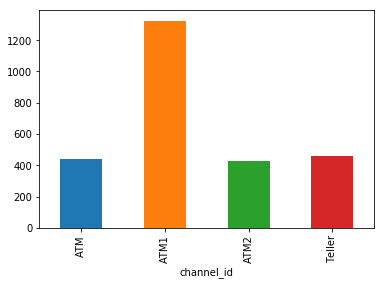

In [86]:
sct = final_replaced[['channel_id','income','transaction_amount']]
sct.groupby('channel_id').size().plot(kind='bar')

plt.show()


_A Swarmplot showing the distribution of channel ids with the transaction amount. This indicates the co-relation with the above graph which tells us that ATM1 is important._

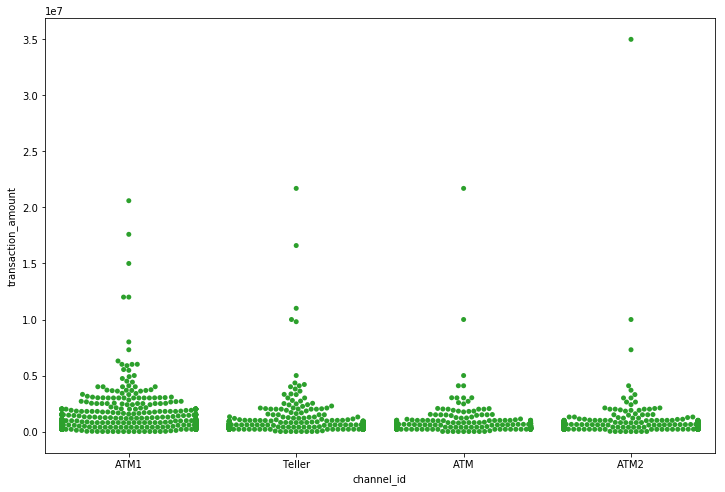

In [58]:
import seaborn as sns
color = sns.color_palette()
atm_vs_type = final_replaced[['channel_id','service_category']]
atm_vs_type_count = cust_atm_vs_type.groupby(['channel_id','service_category'])
atm_type = list(atm_vs_type_count['channel_id'])
service_type = list(atm_vs_type_count['service_category'])
plt.figure(figsize=(12,8))
sns.swarmplot(x= 'channel_id',y='transaction_amount', color = color[2],data=final_replaced)
plt.show()

_The below graph shows the service category of various types of transactions done. Salary displays the highest with Cash deposit transaction._

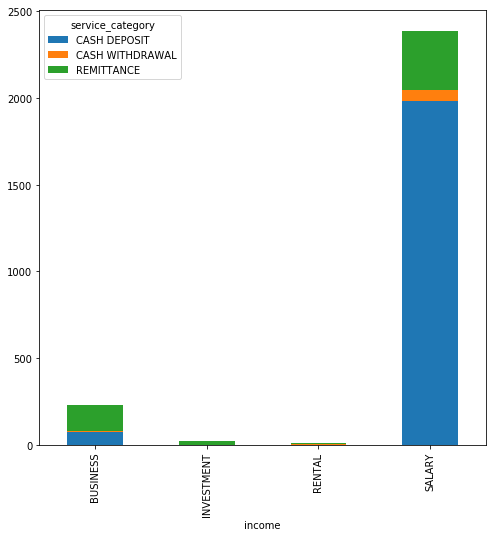

In [161]:
color_table = pd.crosstab(index=final_replaced['income'], columns=final_replaced['service_category'])
color_table.plot(kind="bar", figsize=(8,8),stacked=True)

_Below graph shows the ATM1 being used the highest in the last week of the month_

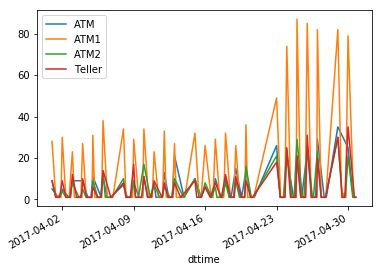

In [75]:
category_channel = final_replaced.channel_id
dttime = final_replaced.transaction_datetime
atm_vs_datetime = pd.DataFrame({'category_channel':category_channel,'dttime':dttime})
channel_cat = (atm_vs_datetime.reset_index().groupby(['dttime','category_channel'],as_index=False).count())

fig, ax = plt.subplots()
for key,data in channel_cat.groupby('category_channel'):
    data.plot(x='dttime',y='index',ax=ax,label=key)

# Classification using Clustering

_Using a dendogram to analyse the right number of clusters required for the clustering_

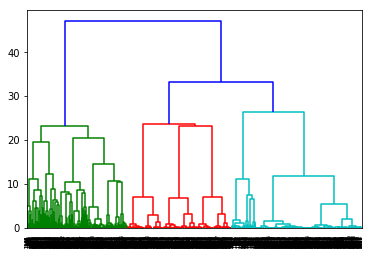

In [163]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X , method= 'ward'))

In [146]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics as sm
from sklearn.metrics import classification_report,confusion_matrix

_Scaling the values using MinMax classifier because of high variance caused by the feature 'transaction amount'_

In [165]:
train_all = final_replaced[['channel_id','transaction_amount','transaction_location','transaction_type','customer_type','sex','educational_status','income','minor','marital_status','dependents',]]
train_dummies = pd.get_dummies(train_all)
scaler = MinMaxScaler()

scaler.fit(train_dummies)
X = scaler.transform(train_dummies)

_KMeans clustering with cluster size =10._

In [150]:
clustering = KMeans(n_clusters=10 , random_state=5)
clustering.fit_predict(X)

array([1, 6, 6, ..., 2, 4, 7])

_Plot showing the KMeans clustering._

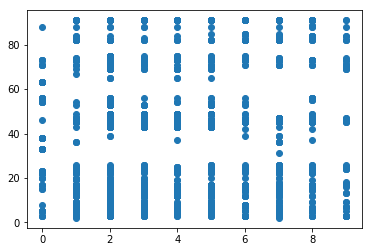

In [153]:
color_theme = np.array(['darkgray','lightsalmon','powerblue','green','black'])
plt.scatter(y=final_replaced.transaction_location,x=clustering.labels_)

### Clustering using Agglomerative Clustering

_with cluster size = 10_

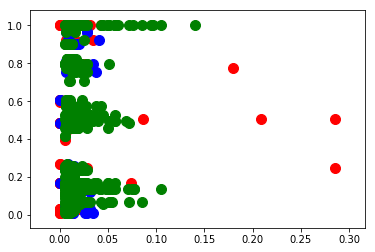

In [164]:
from sklearn.cluster import AgglomerativeClustering
hc  = AgglomerativeClustering(n_clusters = 10 , affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0,0],X[y_hc ==0,1],s=100 , c = 'red',label ='Cluster1')
plt.scatter(X[y_hc == 1,0],X[y_hc ==1,1],s=100 , c = 'blue',label ='Cluster2')
plt.scatter(X[y_hc == 2,0],X[y_hc ==2,1],s=100 , c = 'green',label ='Cluster3')

## Random forest Classification

_with number of decisiontrees = 500_

In [155]:
randomforest = RandomForestClassifier(n_estimators=500)
X_train_rc , X_test_rc , y_train_rc , y_test_rc = train_test_split(X,final_replaced.service_category,test_size=0.2 , random_state = 5)
randomforest.fit(X_train_rc,y_train_rc)
rc_predicted = randomforest.predict(X_test_rc)
randomforest.score(X_test_rc , y_test_rc)

0.93785310734463279

In [156]:
confusion_matrix(rc_predicted,y_test_rc)

array([[403,   0,   7],
       [  0,   3,   8],
       [  9,   9,  92]], dtype=int64)

In [157]:
print classification_report(y_test_rc,rc_predicted)

                 precision    recall  f1-score   support

   CASH DEPOSIT       0.98      0.98      0.98       412
CASH WITHDRAWAL       0.27      0.25      0.26        12
     REMITTANCE       0.84      0.86      0.85       107

    avg / total       0.94      0.94      0.94       531



## Support vector machine classifier

_with kernal = linear and cost function = 0.5_

In [158]:
svm = SVC(kernel='linear',C=0.5)
a = svm.fit(X_train_rc,y_train_rc)
svm_predicted = svm.predict(X_test_rc)
svm.score(X_test_rc , y_test_rc)

0.94161958568738224

In [159]:
confusion_matrix(svm_predicted,y_test_rc)

array([[394,   0,   1],
       [  0,   0,   0],
       [ 18,  12, 106]], dtype=int64)

In [160]:
print classification_report(y_test_rc,svm_predicted)

                 precision    recall  f1-score   support

   CASH DEPOSIT       1.00      0.96      0.98       412
CASH WITHDRAWAL       0.00      0.00      0.00        12
     REMITTANCE       0.78      0.99      0.87       107

    avg / total       0.93      0.94      0.93       531

